Since books are different based on the words that are inside of them, comparing books by comparing words seems to make sense.

In [1]:
%matplotlib inline
import pandas as pd

# Let's compare JRR Tolkien novels with Jane Austen novels

But **before we begin**, a reminder that you can read in files like this:

In [3]:
the_hobbit = open("tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt").read()

#content = open('file.txt').read()

In [4]:
# Let's pull something out of the middle, maybe?
the_hobbit[7500:8000]

'lf our height, and smaller than the bearded Dwarves. Hobbits have no beards. There is little or no magic about them, except the ordinary everyday sort which helps them to disappear quietly and quickly when large stupid folk like you and me come blundering along, making a noise like elephants which they can hear a mile off. They are inclined to be fat in the stomach; they dress in bright colours (chiefly green and yellow); wear no shoes, because their feet grow natural leathery soles and thick wa'

## Reading in many text files

The best way to read in many text files is to keep each category in its own subdirectory, then use `glob.glob` to find all of the filenames

In [5]:
import glob

filenames = glob.glob("tolkien/*.txt")
filenames

['tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt',
 'tolkien/Lord of the Rings - 01 - The Fellowship of the Ring - J. R. R. Tolkien - 1955.txt',
 'tolkien/Lord of the Rings - 02 - The Two Towers - J. R. R. Tolkien - 1965.txt',
 'tolkien/Lord of the Rings - 03 - The Return of the King - J. R. R. Tolkien - 1965.txt']

In [10]:
contents = [open(file).read() for file in filenames]

In [7]:
tolkien_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': 'JRR Tolkien'
})
tolkien_df.head()

,author,body,filename
0,JRR Tolkien,THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,JRR Tolkien,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,JRR Tolkien,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,tolkien/Lord of the Rings - 02 - The Two Tower...
3,JRR Tolkien,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,tolkien/Lord of the Rings - 03 - The Return of...


In [13]:
filenames = glob.glob("austen/*.txt")
contents = [open(file).read() for file in filenames]
austen_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': "Jane Austen"
})
austen_df.head()

,author,body,filename
0,Jane Austen,"The Project Gutenberg EBook of Emma, by Jane A...",austen/emma - 1815.txt
1,Jane Austen,"The Project Gutenberg EBook of Mansfield Park,...",austen/mansfield_park - 1814.txt
2,Jane Austen,The Project Gutenberg EBook of Northanger Abbe...,austen/northanger_abbey - 1817.txt
3,Jane Austen,"The Project Gutenberg EBook of Persuasion, by ...",austen/persuasion - 1817.txt
4,Jane Austen,The Project Gutenberg EBook of Pride and Preju...,austen/pride-and-prejudice - 1813.txt


## Now let's combine them!

In [14]:
df = pd.concat([tolkien_df, austen_df], ignore_index=True)
df

,author,body,filename
0,JRR Tolkien,THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,JRR Tolkien,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,JRR Tolkien,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,tolkien/Lord of the Rings - 02 - The Two Tower...
3,JRR Tolkien,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,tolkien/Lord of the Rings - 03 - The Return of...
4,Jane Austen,"The Project Gutenberg EBook of Emma, by Jane A...",austen/emma - 1815.txt
5,Jane Austen,"The Project Gutenberg EBook of Mansfield Park,...",austen/mansfield_park - 1814.txt
6,Jane Austen,The Project Gutenberg EBook of Northanger Abbe...,austen/northanger_abbey - 1817.txt
7,Jane Austen,"The Project Gutenberg EBook of Persuasion, by ...",austen/persuasion - 1817.txt
8,Jane Austen,The Project Gutenberg EBook of Pride and Preju...,austen/pride-and-prejudice - 1813.txt
9,Jane Austen,The Project Gutenberg EBook of Sense and Sensi...,austen/sense-and-sensibility - 1811.txt


# Counting words

What words are we interested in? Right now just **he** and **she**.

In [17]:
df['body']

0    THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...
1    THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...
2    THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...
3    THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...
4    The Project Gutenberg EBook of Emma, by Jane A...
5    The Project Gutenberg EBook of Mansfield Park,...
6    The Project Gutenberg EBook of Northanger Abbe...
7    The Project Gutenberg EBook of Persuasion, by ...
8    The Project Gutenberg EBook of Pride and Preju...
9    The Project Gutenberg EBook of Sense and Sensi...
Name: body, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=['he', 'she'], use_idf=False, norm='l1')
matrix = vectorizer.fit_transform(df['body'])
matrix

<10x2 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

When we do this analysis, giving in a `vocabulary=`, we're getting back **a percentage of usage.** 

* if a book uses "he" once and "she" once, it's going to be 0.5 and 0.5
* if a book uses "he" a hundred times and "she" a hundred times, it's still going to be 0.5 and 0.5.
* if a book is ten million pages long and only uses the word 'he' once and the word 'she' none at all, it's going to be 1.0

You need to think, do you care about the proportion relative to the other words?

In [18]:
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results

,he,she
0,0.999479,0.000521
1,0.950636,0.049364
2,0.963264,0.036736
3,0.919724,0.080276
4,0.436009,0.563991
5,0.407700,0.592300
6,0.332725,0.667275
7,0.456872,0.543128
8,0.439113,0.560887
9,0.409374,0.590626


# Store our original information back into the dataframe

In [19]:
df['author']

0    JRR Tolkien
1    JRR Tolkien
2    JRR Tolkien
3    JRR Tolkien
4    Jane Austen
5    Jane Austen
6    Jane Austen
7    Jane Austen
8    Jane Austen
9    Jane Austen
Name: author, dtype: object

In [20]:
results['author'] = df['author']
results['filename'] = df['filename']
results

,he,she,author,filename
0,0.999479,0.000521,JRR Tolkien,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,0.950636,0.049364,JRR Tolkien,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,0.963264,0.036736,JRR Tolkien,tolkien/Lord of the Rings - 02 - The Two Tower...
3,0.919724,0.080276,JRR Tolkien,tolkien/Lord of the Rings - 03 - The Return of...
4,0.436009,0.563991,Jane Austen,austen/emma - 1815.txt
5,0.407700,0.592300,Jane Austen,austen/mansfield_park - 1814.txt
6,0.332725,0.667275,Jane Austen,austen/northanger_abbey - 1817.txt
7,0.456872,0.543128,Jane Austen,austen/persuasion - 1817.txt
8,0.439113,0.560887,Jane Austen,austen/pride-and-prejudice - 1813.txt
9,0.409374,0.590626,Jane Austen,austen/sense-and-sensibility - 1811.txt


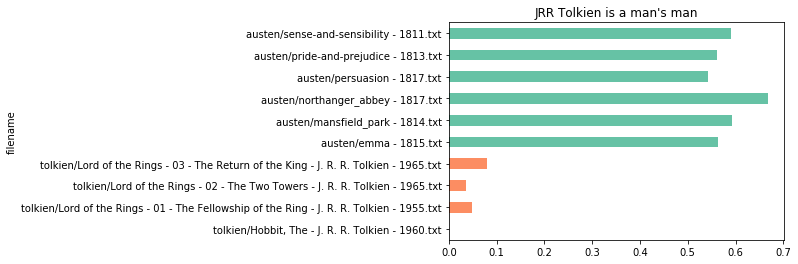

In [21]:
import matplotlib.pyplot as plt

# Step One: Make a dictionary with column values as keys
# then the color as the value
colormap = {
    'Jane Austen': '#66c2a5',
    'JRR Tolkien': '#fc8d62'
}

# Step Two: Use. apply to convert it into a list of colors
colors = df.author.apply(lambda authorname: colormap[authorname])

# df.author = give me just author column
# .apply = do sth for every single row


ax = results.plot(y='she', kind='barh', x='filename', color=[colors], legend=False)
ax.set_title("JRR Tolkien is a man's man")

# Trying it again

This time we're going to **count all of the other words, too.** Then we'll pull out 'he' and 'she' specifically.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vectorizer.fit_transform(df['body'])
matrix

<10x24446 sparse matrix of type '<class 'numpy.float64'>'
	with 76411 stored elements in Compressed Sparse Row format>

### Have ALL of the words available

In [23]:
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results

,000,007,05,10,100,1000,1001,1002,10022,1003,...,óinand,óinto,ómaryo,ónen,óre,únótime,únótimë,úre,úrimë,úrui
0,0.000000,0.000011,0.00000,0.000021,0.000000,0.000000,0.000000,0.000000,0.000011,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000005,0.00000,0.000027,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,...,0.000005,0.000005,0.000005,0.00000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
2,0.000000,0.000007,0.00000,0.000033,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000005,0.00001,0.000131,0.000034,0.000048,0.000078,0.000058,0.000005,0.000019,...,0.000000,0.000000,0.000000,0.00001,0.000005,0.000005,0.000000,0.000005,0.000005,0.000005
4,0.000019,0.000000,0.00000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000013,0.000000,0.00000,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000013,0.000000,0.00000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000012,0.000000,0.00000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000008,0.000000,0.00000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000008,0.000000,0.00000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### But then only pull out the ones we want

In [24]:
results = results[['he', 'she']]
results

,he,she
0,0.020264,0.000011
1,0.016356,0.000849
2,0.017832,0.000680
3,0.014221,0.001241
4,0.011475,0.014843
5,0.009785,0.014215
6,0.007019,0.014077
7,0.011486,0.013655
8,0.010952,0.013989
9,0.009404,0.013568


## Copy our author and filename back over

In [25]:
results['author'] = df['author']
results['filename'] = df['filename']
results

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,he,she,author,filename
0,0.020264,0.000011,JRR Tolkien,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,0.016356,0.000849,JRR Tolkien,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,0.017832,0.000680,JRR Tolkien,tolkien/Lord of the Rings - 02 - The Two Tower...
3,0.014221,0.001241,JRR Tolkien,tolkien/Lord of the Rings - 03 - The Return of...
4,0.011475,0.014843,Jane Austen,austen/emma - 1815.txt
5,0.009785,0.014215,Jane Austen,austen/mansfield_park - 1814.txt
6,0.007019,0.014077,Jane Austen,austen/northanger_abbey - 1817.txt
7,0.011486,0.013655,Jane Austen,austen/persuasion - 1817.txt
8,0.010952,0.013989,Jane Austen,austen/pride-and-prejudice - 1813.txt
9,0.009404,0.013568,Jane Austen,austen/sense-and-sensibility - 1811.txt


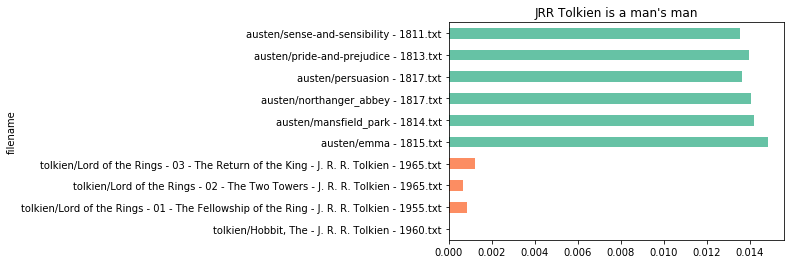

In [26]:
import matplotlib.pyplot as plt

colormap = {
    'Jane Austen': '#66c2a5',
    'JRR Tolkien': '#fc8d62'
}
colors = df.author.apply(lambda authorname: colormap[authorname])

ax = results.plot(y='she', kind='barh', x='filename', color=[colors], legend=False)
ax.set_title("JRR Tolkien is a man's man")

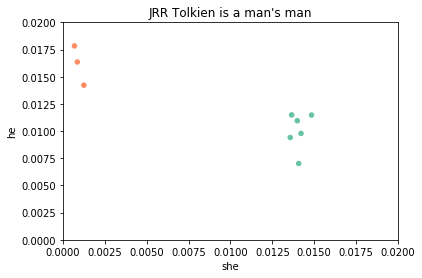

In [27]:
import matplotlib.pyplot as plt

colormap = {
    'Jane Austen': '#66c2a5',
    'JRR Tolkien': '#fc8d62'
}
colors = df.author.apply(lambda authorname: colormap[authorname])

ax = results.plot(x='she', y='he', kind='scatter', color=colors, legend=False, xlim=(0,0.02), ylim=(0,0.02))
ax.set_title("JRR Tolkien is a man's man")